# I) Lý thuyết

1) What are the primary Generativ AI usercases of Healthcare Industry?

A) Drug discovery, Gene decoding

B) Gene decoding, Personalized medicine

C) Personalized medicine, Doctor assistant, Drug discovery

**D) Doctor assistant, Gene decoding, Personalized medicine, Drug discovery**






2) What are the primary Generative AI usercases of Marketing Industry?

A) Content creator, Writing email, Chatbot assistant

**B) Media generation, Writing email, Chatbot assistant, Customer DNA, Content creator**

C) Chatbot assistant, Media generation, Writing email, Content creator

D) Customer DNA, Content creator

3) What are the primary Generative AI usercases for Industry?

A) Machine Automation & Optimization, Product design & development, Supply chain management, Quality control

**B) Quality control, Product design & development, Supply chain management**

C) Product design & development, Machine Automation & Optimization, Quality control

D) Supply chain management, Machine Automation & Optimization, Quality control


4) How does Langchain differentiate between 'Chains' and 'Agents' in the context of Text-2-SQL?

A) Chains are suitable for straightforward and predictable tasks, such as converting a question into a SQL query, running it, and generating an answer using the results.

B) Agents offer more flexibility and can handle more intricate tasks that may require multiple interactions with the database to answer a question.

C) Chains offer more flexibility and can handle more intricate tasks that may require multiple interactions with the database to answer a question.

**D) A and B**

5) Which of the following options best describes a typical stage in the main pipeline of a Text-2-SQL system?

A) Data Visualization: Transforming the retrieved data into graphical representations like charts and graphs for better user understanding.

B) Sentiment Analysis: Determining the emotional tone expressed in the user's natural language input to tailor the SQL query generation.

**C) Query Understanding: Interpreting the user's intent from the natural language input and identifying key elements like entities and relationships to prepare for SQL query construction.**

D) Code Optimization: Refining the generated SQL query to enhance its performance and efficiency within the database environment.

# II) Thực hành

1) Hãy xây dựng một cơ sở dữ liệu SQL và thực hiện hỏi đáp trên cơ sở dũ liệu SQL đó. Lưu ý: Trường hợp bạn không thể tạo được SQL database của riêng mình thì có thể sử dụng lại bộ dữ liệu Chinook.db từ bài thực hành.

2) Xây dựng một ứng dụng trợ lý tài chính cho thị trường chứng khoán Việt Nam sử dụng thư viện [vnquant](https://github.com/phamdinhkhanh/vnquant)

Bài tập 1 : Tham khảo bài làm của buổi 8 : https://colab.research.google.com/drive/1QJyl_evwZ6EPlbajabGGbojNpT8H_r-z?usp=sharing

Notebook lấy data chứng khoán :
https://colab.research.google.com/drive/12vEfQW3c5x5nO0jbH3T42U0zQLB6gFSC?usp=sharing

In [2]:

%%capture --no-stderr
%pip install --upgrade --quiet langchain==0.3.7 langchain-community==0.3.5 langchain-together==0.2.0 faiss-cpu==1.9.0
%pip install sqlalchemy==2.0.35 ipython-sql

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import userdata
import os
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['LANGCHAIN_API_KEY'] = userdata.get('LANGCHAIN_API_KEY')
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')


# Model 1 with a single share

Respond with insights on stock volatility, trading opportunities, and clear explanations.

In [10]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/GenAI course/bossAI/StockAssistantbot/modified_file_E1VFVN30.csv'
data = pd.read_csv(file_path)

# Step 1: Prepare data
data['volatility'] = (data['high'] - data['low']) / data['low'] * 100  # Calculate volatility
data['moving_average'] = data['close'].rolling(window=7).mean()  # 7-day moving average

# Step 2: Build LangChain Vector Store
embeddings = OpenAIEmbeddings()

# Convert DataFrame to documents
documents = []
for index, row in data.iterrows():
    content = f"Date: {row['date']}, Code: {row['code']}, Close: {row['close']}, Volatility: {row['volatility']}"
    documents.append(Document(page_content=content, metadata=row.to_dict()))

vector_store = FAISS.from_documents(documents, embeddings) # Use from_documents instead of from_dataframe

# Step 3: Define Prompt
template = """
You are a Stock Assistant AI specializing in analyzing stock volatility and trading opportunities.
Use the following stock data context:
{context}
Respond with insights on stock volatility, trading opportunities, and clear explanations.
If unsure, admit that you don't know or suggest contacting an expert.
"""
prompt = PromptTemplate(template=template, input_variables=["context"])

# Step 4: Initialize RetrievalQA Chain (use gpt-3.5-turbo for the LLM)
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=vector_store.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
)

# Step 5: Query the Assistant
query = "What is the volatility and trading opportunity for E1VFVN30 in the last month?"
response = qa_chain({"query": query})
print(response['result'])


<ipython-input-10-69cd2624ab22>:38: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)


Based on the provided stock data context, it is evident that the stock with the code E1VFVN30 has experienced varying levels of volatility over the past year. 

On 11/1/24, the stock closed at 23230 with a volatility of 1.0371650821089022. This indicates a relatively stable period for the stock.

On 3/28/24, the stock closed at 22430 with a higher volatility of 1.9909502262443437. This suggests a more volatile period for the stock compared to the previous date.

On 11/3/23, the stock closed at 18830 with a volatility of 1.2868632707774799. This date also shows a moderate level of volatility for the stock.

On 10/24/24, the stock closed at 23290 with a volatility of 1.4598540145985401. This date indicates a slightly higher volatility compared to the first date provided.

Based on the data, it is important to note that higher volatility can present both risks and opportunities for traders. Higher volatility can lead to larger price swings, which can create trading opportunities for those

# More analysis

Respond with insights on:
- Volatility
- Moving Average
- Relative Strength Index (RSI)
- MACD (and Signal Line)
- Daily and Monthly Percentage Changes

In [13]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/GenAI course/bossAI/StockAssistantbot/modified_file_E1VFVN30.csv'
data = pd.read_csv(file_path)

# Step 1: Calculate Additional Indicators
# Calculate daily percentage change
data['daily_change'] = (data['close'] - data['open']) / data['open'] * 100

# Calculate monthly percentage change
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data['monthly_change'] = data['close'].resample('M').ffill().pct_change() * 100
data.reset_index(inplace=True)

# Calculate RSI
window_length = 14
delta = data['close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate MACD (12-day EMA - 26-day EMA) and Signal Line (9-day EMA of MACD)
ema_12 = data['close'].ewm(span=12, adjust=False).mean()
ema_26 = data['close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema_12 - ema_26
data['MACD_signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Calculate Volatility
data['volatility'] = (data['high'] - data['low']) / data['low'] * 100

# Calculate 7-day Moving Average
data['moving_average'] = data['close'].rolling(window=7).mean()

# Drop any rows with NaN values due to rolling calculations
data.dropna(inplace=True)

# Step 2: Initialize OpenAI Embeddings
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")
documents = [Document(page_content=str(row.to_dict()), metadata=row.to_dict()) for _, row in data.iterrows()]  # Convert dataframe rows to Document objects
vector_store = FAISS.from_documents(documents, embeddings)  # Create FAISS vector store from documents

# Step 3: Define Prompt
template = """
You are a Stock Assistant AI specializing in analyzing stock volatility, trading opportunities, and market indicators.
Use the following stock data context:
{context}
Respond with insights on:
- Volatility
- Moving Average
- Relative Strength Index (RSI)
- MACD (and Signal Line)
- Daily and Monthly Percentage Changes
Provide clear, accurate, and up-to-date explanations for your analysis.
If unsure, admit that you don't know or suggest contacting an expert.
"""
prompt = PromptTemplate(template=template, input_variables=["context"])

# Step 4: Initialize RetrievalQA Chain
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=vector_store.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
)

# Step 5: Query the Assistant
query_02 = "Can you provide the analysis for E1VFVN30, including RSI, MACD, daily change, and monthly change?"
response_02 = qa_chain({"query": query_02})
print(response_02['result'])


<ipython-input-13-a1d732dfe6b9>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-13-a1d732dfe6b9>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['monthly_change'] = data['close'].resample('M').ffill().pct_change() * 100


Based on the provided stock data context, here are the insights on the key indicators:

1. Volatility:
- The stock has shown varying levels of volatility over the different time periods. The volatility values range from approximately 0.79 to 2.89, indicating fluctuations in price movements.
- Higher volatility can present both opportunities and risks for traders. It suggests that the stock price can experience significant changes in a short period, potentially offering trading opportunities for those who can manage the risk effectively.

2. Moving Average:
- The moving average values for the stock range from around 18,598 to 25,803. The moving average is a trend-following indicator that smooths out price data to identify the underlying trend.
- Traders often use moving averages to confirm trends and potential reversal points. A rising moving average suggests an uptrend, while a declining moving average indicates a downtrend.

3. Relative Strength Index (RSI):
- The RSI values for the s

# Combine all 3 stocks : E1VFVN30, FUEDCMID, AND ENF

In [36]:
# stock_chatbot_analyst.py

import pandas as pd
import numpy as np
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.schema import Document

# Load all stock data files
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/GenAI course/bossAI/StockAssistantbot/modified_file_E1VFVN30.csv',
    '/content/drive/MyDrive/Colab Notebooks/GenAI course/bossAI/StockAssistantbot/modified_file_FUEDCMID.csv',
    '/content/drive/MyDrive/Colab Notebooks/GenAI course/bossAI/StockAssistantbot/modified_file_ENF.csv'
]

# Step 1: Combine and Process All Data
dataframes = []
for path in file_paths:
    df = pd.read_csv(path)
    df['code'] = path.split("_")[-1].split(".")[0]  # Extract stock code from filename
    df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
    dataframes.append(df)

# Combine all datasets
data = pd.concat(dataframes, ignore_index=True)

# Remove duplicate rows if they exist
data = data.drop_duplicates(subset=['date', 'code'], keep='first')

# Set 'date' as index
data.set_index('date', inplace=True)

# Step 2: Process Indicators
# Calculate daily percentage change
data['daily_change'] = (data['close'] - data['open']) / data['open'] * 100

# Calculate monthly percentage change
monthly_change = (
    data.groupby('code')['close']
    .resample('M')
    .ffill()
    .pct_change()
    .reset_index()
    .rename(columns={'close': 'monthly_change'})
)
monthly_change['monthly_change'] = monthly_change['monthly_change'] * 100  # Multiply by 100 after reset_index

# Merge monthly change back to original DataFrame
data = data.reset_index()  # Reset index to make 'date' a column for merging
monthly_change['date'] = pd.to_datetime(monthly_change['date'])  # Ensure correct datetime type
data = data.merge(monthly_change, on=['date', 'code'], how='left').set_index('date')  # Re-set 'date' as index

# Step 3: Calculate RSI
window_length = 14
# Calculate RSI for each stock code separately
data['RSI'] = data.groupby('code')['close'].transform(lambda x: 100 - (100 / (1 + (x.diff().where(x.diff() > 0, 0).rolling(window=window_length).mean() / -x.diff().where(x.diff() < 0, 0).rolling(window=window_length).mean().abs()))))


# Step 4: Calculate MACD and Signal Line
# Calculate ema_12 and ema_26 without groupby, using transform instead
data['ema_12'] = data.groupby('code')['close'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
data['ema_26'] = data.groupby('code')['close'].transform(lambda x: x.ewm(span=26, adjust=False).mean())

# calculate MACD using the new columns
data['MACD'] = data['ema_12'] - data['ema_26']

data['MACD_signal'] = data.groupby('code')['MACD'].transform(lambda x: x.ewm(span=9, adjust=False).mean())

# Step 5: Calculate Volatility
data['volatility'] = (data['high'] - data['low']) / data['low'] * 100

# Step 6: Calculate Moving Average
data = data.reset_index()  # Reset the index to have a unique index
data['moving_average'] = data.groupby('code')['close'].rolling(window=7).mean().values
data = data.set_index('date') # Set the index back to 'date'

# Drop NaN values
data.dropna(inplace=True)

# Step 7: Initialize OpenAI Embeddings
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")
documents = [
    Document(page_content=str(row.to_dict()), metadata=row.to_dict()) for _, row in data.iterrows()
]  # Convert dataframe rows to Document objects
vector_store = FAISS.from_documents(documents, embeddings)  # Create FAISS vector store from documents

# Step 8: Define Comparative Analysis Prompt
template = """
You are an Advanced Stock Assistant AI specializing in analyzing multiple stocks. The following data contains insights for {context}.
Provide:
1. A comparative analysis of volatility, RSI, MACD, daily change, and monthly change between all stocks.
2. Identify trading opportunities for each stock.
3. Highlight any stocks with exceptionally high or low trading opportunities based on these indicators.
If unsure, admit that you don't know or suggest contacting an expert.
"""
prompt = PromptTemplate(template=template, input_variables=["context"])

# Step 9: Initialize RetrievalQA Chain
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=vector_store.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
)

# Step 10: Query the Assistant
query_03 = "Can you provide a comparative analysis of E1VFVN30, APPL, and GOOGL stock trading opportunities?"
response_03 = qa_chain({"query": query_03})
print(response_03['result'])



<ipython-input-36-85b7b6494e45>:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
<ipython-input-36-85b7b6494e45>:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
<ipython-input-36-85b7b6494e45>:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
<ipython-input-36-85b7b6494e45>:41: FutureWarning: 'M' is deprecated and will be removed in a future ve

1. Comparative Analysis:
- Volatility: The first stock has the highest volatility at 1.494, followed by the third stock at 1.112 and the second stock at 1.054.
- RSI: The third stock has the highest RSI at 194, followed by the first stock at 218.75 and the second stock at 126.61.
- MACD: The second stock has the highest MACD at 877.10, followed by the third stock at 519.04 and the first stock at 215.53.
- Daily Change: The first stock has the highest daily change at 0.389, followed by the second stock at 0.273 and the third stock at -0.4.
- Monthly Change: The second stock has the highest monthly change at 5.30, followed by the first stock at 0.233 and the third stock at -9.70.

2. Trading Opportunities:
- Stock 1: With high volatility and RSI, there may be potential trading opportunities for short-term gains. The daily change is positive, indicating a bullish trend.
- Stock 2: High MACD and monthly change suggest potential trading opportunities for long-term gains. The RSI is moderate

# Visualize

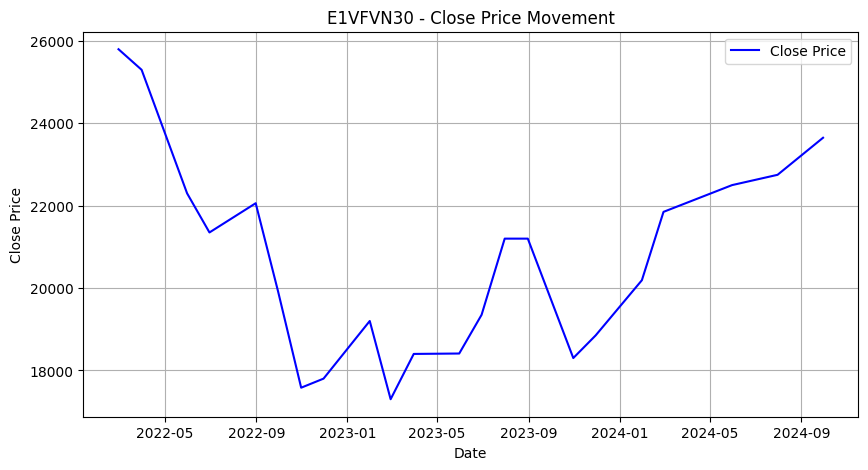

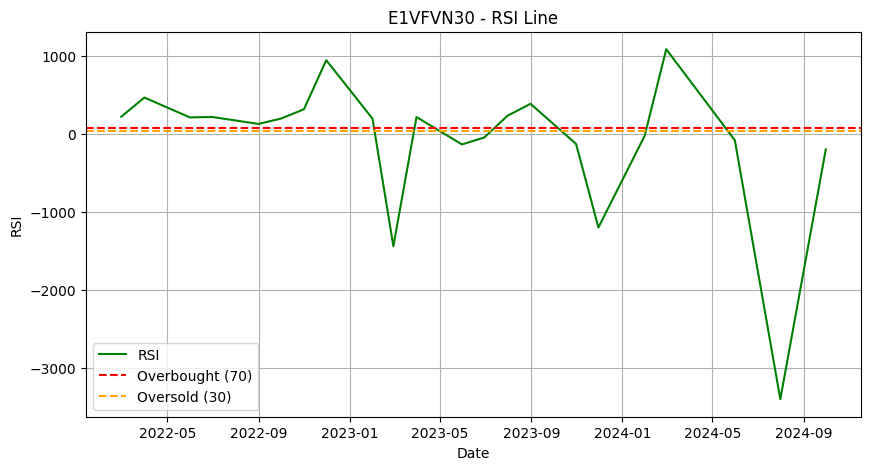

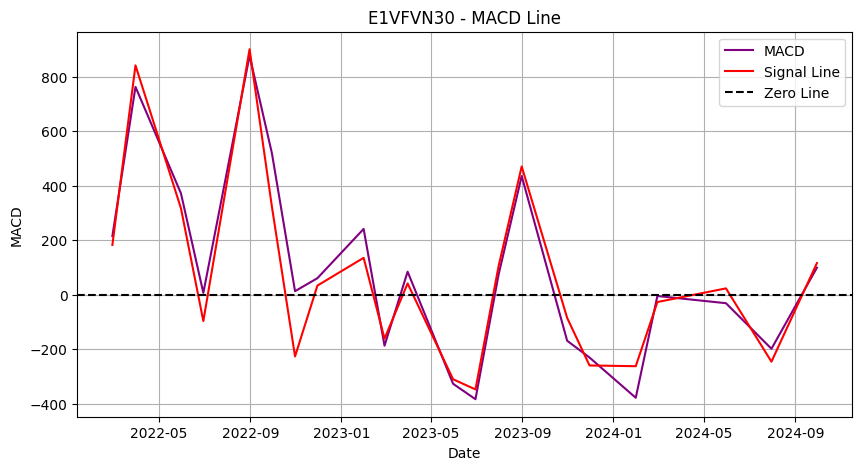

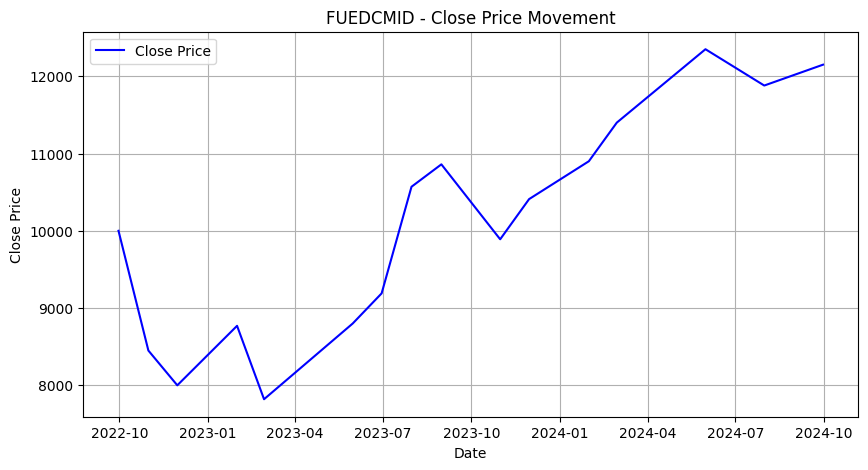

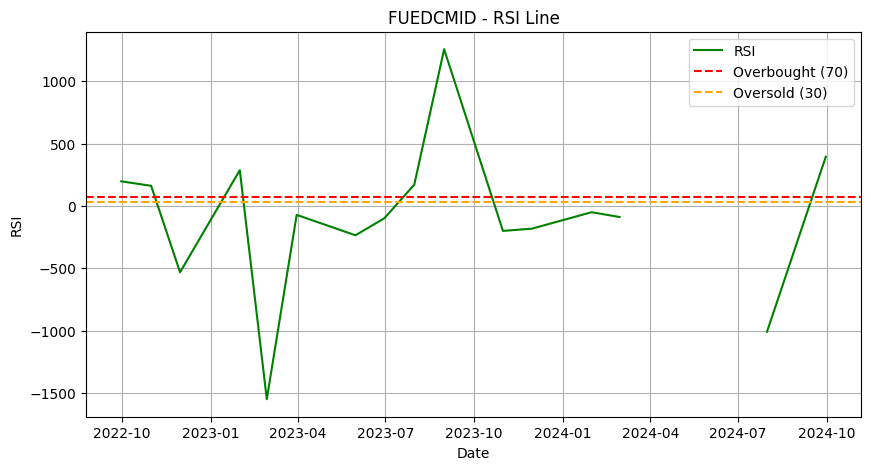

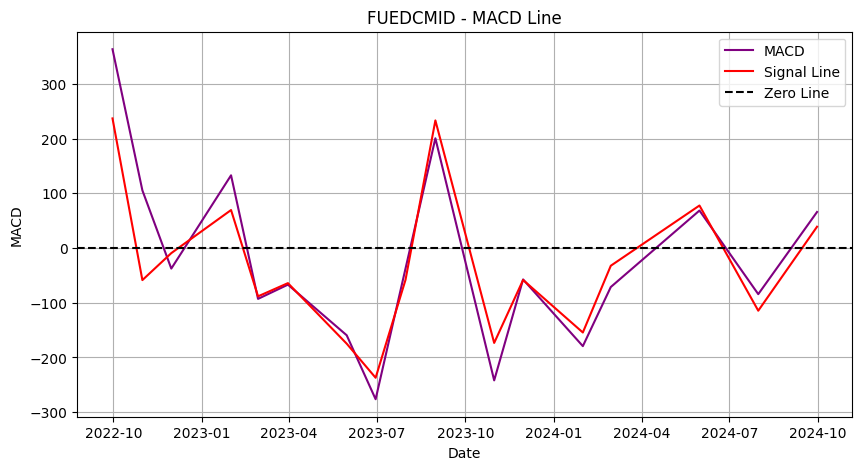

In [38]:
import matplotlib.pyplot as plt

# Ensure matplotlib works in this environment
plt.rcParams.update({'figure.max_open_warning': 0})

# Function to plot stock performance
def plot_stock_performance(data, stock_code):
    stock_data = data[data['code'] == stock_code]

    # Plot Close Price Movement
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data.index, stock_data['close'], label='Close Price', color='blue')
    plt.title(f"{stock_code} - Close Price Movement")
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot RSI Line
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data.index, stock_data['RSI'], label='RSI', color='green')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='orange', linestyle='--', label='Oversold (30)')
    plt.title(f"{stock_code} - RSI Line")
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot MACD Line
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data.index, stock_data['MACD'], label='MACD', color='purple')
    plt.plot(stock_data.index, stock_data['MACD_signal'], label='Signal Line', color='red')
    plt.axhline(0, color='black', linestyle='--', label='Zero Line')
    plt.title(f"{stock_code} - MACD Line")
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.legend()
    plt.grid()
    plt.show()

# Visualize for each stock
unique_stocks = data['code'].unique()
for stock in unique_stocks:
    plot_stock_performance(data, stock)


<ipython-input-41-aae988d86a83>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
<ipython-input-41-aae988d86a83>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
<ipython-input-41-aae988d86a83>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
<ipython-input-41-aae988d86a83>:35: FutureWarning: 'M' is deprecated and will be removed in a future ve

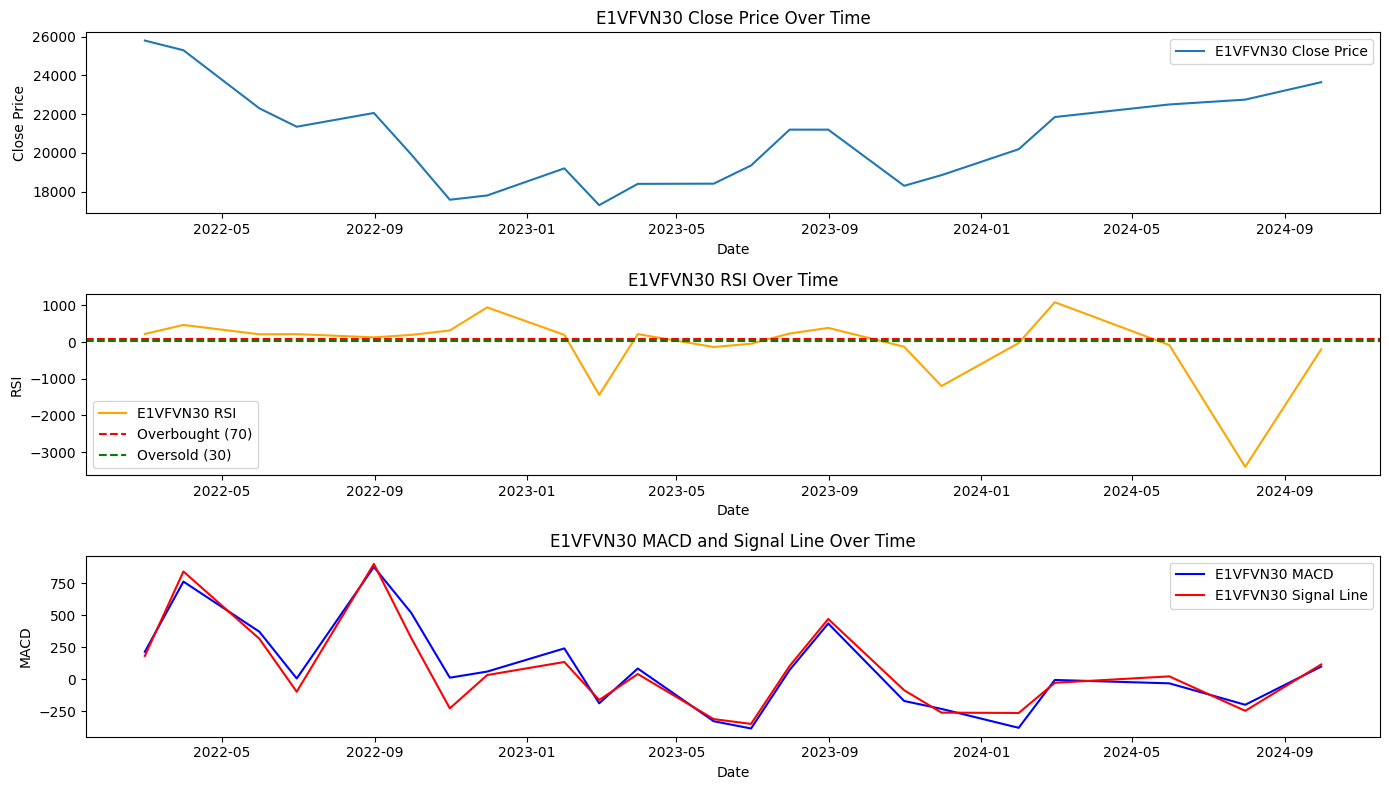

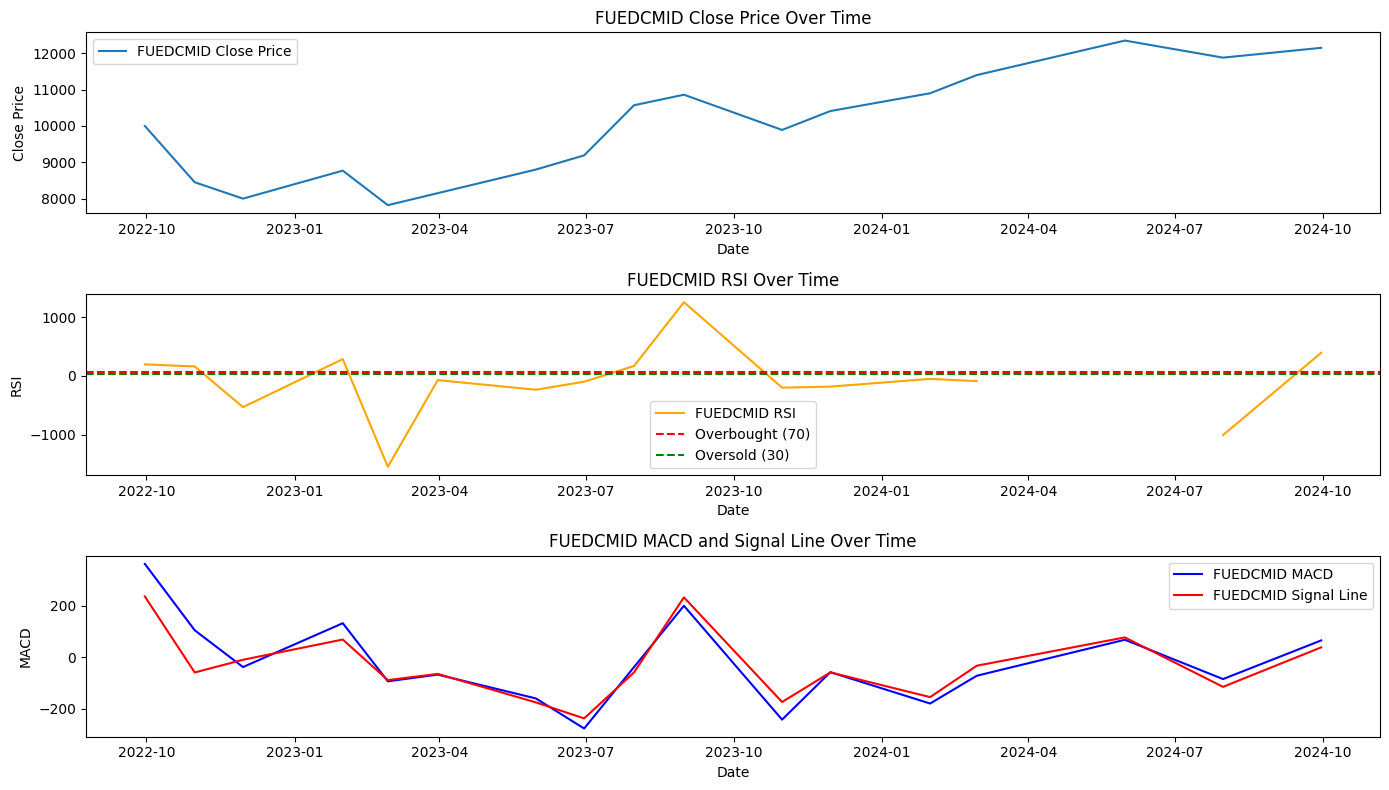

In [41]:
# stock_analysis.py

import pandas as pd
import matplotlib.pyplot as plt


# Load all stock data files
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/GenAI course/bossAI/StockAssistantbot/modified_file_E1VFVN30.csv',
    '/content/drive/MyDrive/Colab Notebooks/GenAI course/bossAI/StockAssistantbot/modified_file_FUEDCMID.csv',
    '/content/drive/MyDrive/Colab Notebooks/GenAI course/bossAI/StockAssistantbot/modified_file_ENF.csv'
]
# Step 1: Combine and Process All Data
dataframes = []
for path in file_paths:
    df = pd.read_csv(path)
    df['code'] = path.split("_")[-1].split(".")[0]  # Extract stock code from filename
    df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
    dataframes.append(df)

# Combine all datasets
data = pd.concat(dataframes, ignore_index=True)

# Remove duplicate rows if they exist
data = data.drop_duplicates(subset=['date', 'code'], keep='first')

# Set 'date' as index
data.set_index('date', inplace=True)

# Step 2: Process Indicators
# Calculate daily percentage change
data['daily_change'] = (data['close'] - data['open']) / data['open'] * 100

# Calculate monthly percentage change
monthly_change = (
    data.groupby('code')['close']
    .resample('M')
    .ffill()
    .pct_change()
    .reset_index()
    .rename(columns={'close': 'monthly_change'})
)
monthly_change['monthly_change'] = monthly_change['monthly_change'] * 100  # Multiply by 100 after reset_index

# Merge monthly change back to original DataFrame
data = data.reset_index()  # Reset index to make 'date' a column for merging
monthly_change['date'] = pd.to_datetime(monthly_change['date'])  # Ensure correct datetime type
data = data.merge(monthly_change, on=['date', 'code'], how='left').set_index('date')  # Re-set 'date' as index

# Step 3: Calculate RSI
window_length = 14
# Calculate RSI for each stock code separately
data['RSI'] = data.groupby('code')['close'].transform(lambda x: 100 - (100 / (1 + (x.diff().where(x.diff() > 0, 0).rolling(window=window_length).mean() / -x.diff().where(x.diff() < 0, 0).rolling(window=window_length).mean().abs()))))


# Step 4: Calculate MACD and Signal Line
# Calculate ema_12 and ema_26 without groupby, using transform instead
data['ema_12'] = data.groupby('code')['close'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
data['ema_26'] = data.groupby('code')['close'].transform(lambda x: x.ewm(span=26, adjust=False).mean())

# calculate MACD using the new columns
data['MACD'] = data['ema_12'] - data['ema_26']

data['MACD_signal'] = data.groupby('code')['MACD'].transform(lambda x: x.ewm(span=9, adjust=False).mean())

# Step 5: Calculate Volatility
data['volatility'] = (data['high'] - data['low']) / data['low'] * 100

# Step 6: Calculate Moving Average
data = data.reset_index()  # Reset the index to have a unique index
data['moving_average'] = data.groupby('code')['close'].rolling(window=7).mean().values
data = data.set_index('date') # Set the index back to 'date'

# Drop NaN values
data.dropna(inplace=True)

## Visualize all 3 shares
# Plot close price, RSI, and MACD for each stock
stock_codes = data['code'].unique()

for code in stock_codes:
    stock_data = data[data['code'] == code]

    plt.figure(figsize=(14, 8))

    # Close Price
    plt.subplot(3, 1, 1)
    plt.plot(stock_data.index, stock_data['close'], label=f'{code} Close Price')
    plt.title(f'{code} Close Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()

    # RSI
    plt.subplot(3, 1, 2)
    plt.plot(stock_data.index, stock_data['RSI'], label=f'{code} RSI', color='orange')
    plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f'{code} RSI Over Time')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()

    # MACD
    plt.subplot(3, 1, 3)
    plt.plot(stock_data.index, stock_data['MACD'], label=f'{code} MACD', color='blue')
    plt.plot(stock_data.index, stock_data['MACD_signal'], label=f'{code} Signal Line', color='red')
    plt.title(f'{code} MACD and Signal Line Over Time')
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.legend()

    plt.tight_layout()
    plt.show()
